Naming Scheme:   s1 - sample 1, ns->no stress, s->stress

In [1]:
import pandas as pd
data = {'samples': ['s1', 's2', 's3', 's4', 's5'],
        'stress': ['no', 'no', 'yes', 'yes', 'yes']}
df = pd.DataFrame(data)
df

,samples,stress
0,s1,no
1,s2,no
2,s3,yes
3,s4,yes
4,s5,yes


In [20]:
pip install openai-whisper

  Using cached openai-whisper-20240930.tar.gz (800 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tiktoken-0.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cu

In [ ]:
model = whisper.load_model("large")

In [24]:

import whisper
import os

def transcribe_audio(audio_path):
    result = model.transcribe(audio_path, language='en')
    return result["text"]


audio_files = ['s1', 's2', 's3', 's4', 's5']
transcripts = []
for file in audio_files:
    audio_path = os.path.join('/content', f'{file}.wav')
    if os.path.exists(audio_path):
      transcript = transcribe_audio(audio_path)
      transcripts.append(transcript)
    else:
      transcripts.append(f"File {audio_path} not found.")


df['text'] = transcripts
df


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability
0,s1,no,Every day is a good day to learn something ne...,2,[],2.113210,62.205563
1,s2,no,Machine learning helps us find patterns in co...,2,[],1.768864,108.224854
2,s3,yes,How to say that? It was like when I kept my h...,7,[],2.061942,93.687408
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180
4,s5,yes,maybe I don't know I guess like it was tough,4,[],1.828455,0.662285


In [3]:
import librosa
import soundfile as sf
for i in range(1, 6):
    try:
        y, sr = librosa.load(f'/content/s{i}.m4a')
        sf.write(f'/content/s{i}.wav', y, sr)
        print(f"Converted s{i}.m4a to s{i}.wav")
    except FileNotFoundError:
        print(f"File s{i}.m4a not found.")
    except Exception as e:
        print(f"An error occurred while processing s{i}.m4a: {e}")

<ipython-input-3-3d96a16a0d4e>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'/content/s{i}.m4a')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Converted s1.m4a to s1.wav
Converted s2.m4a to s2.wav


<ipython-input-3-3d96a16a0d4e>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'/content/s{i}.m4a')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-3d96a16a0d4e>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'/content/s{i}.m4a')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Converted s3.m4a to s3.wav
Converted s4.m4a to s4.wav


<ipython-input-3-3d96a16a0d4e>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'/content/s{i}.m4a')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-3d96a16a0d4e>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f'/content/s{i}.m4a')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Converted s5.m4a to s5.wav


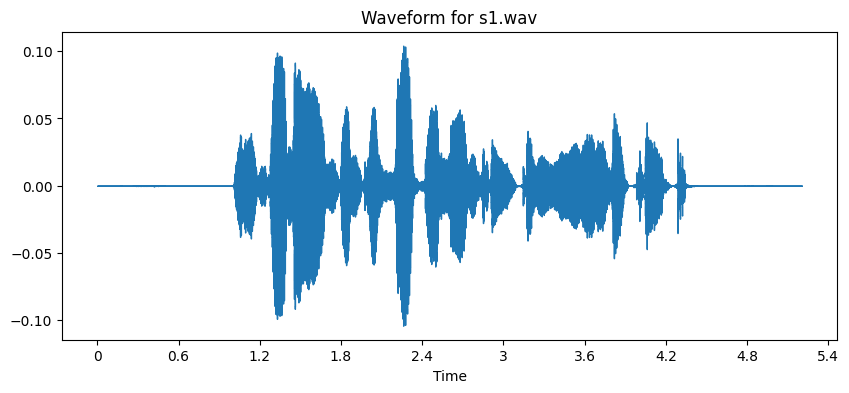

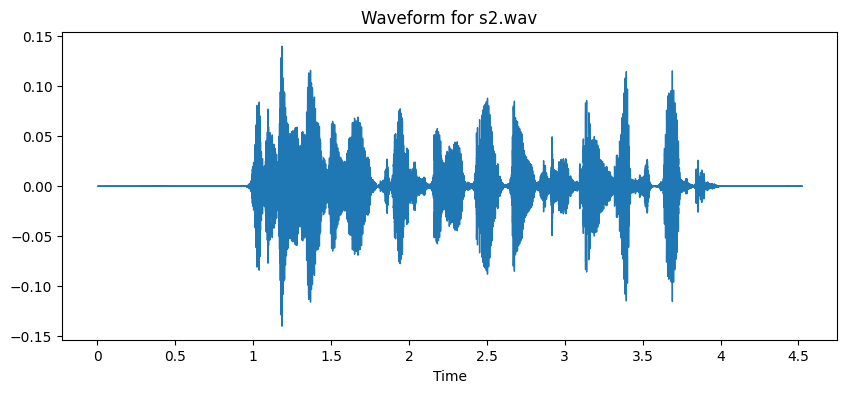

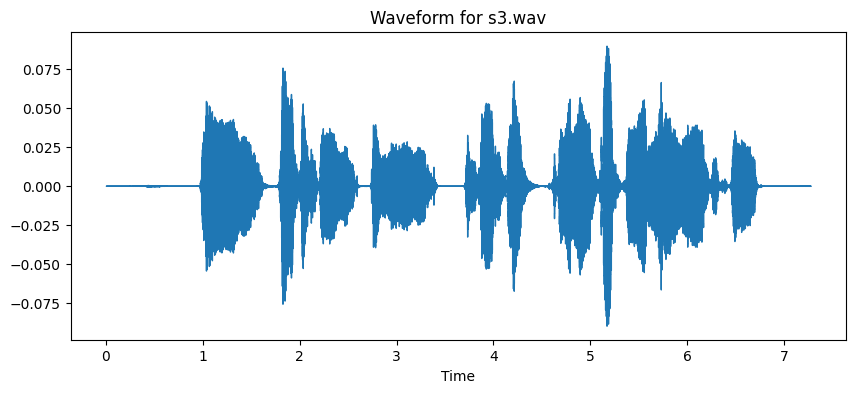

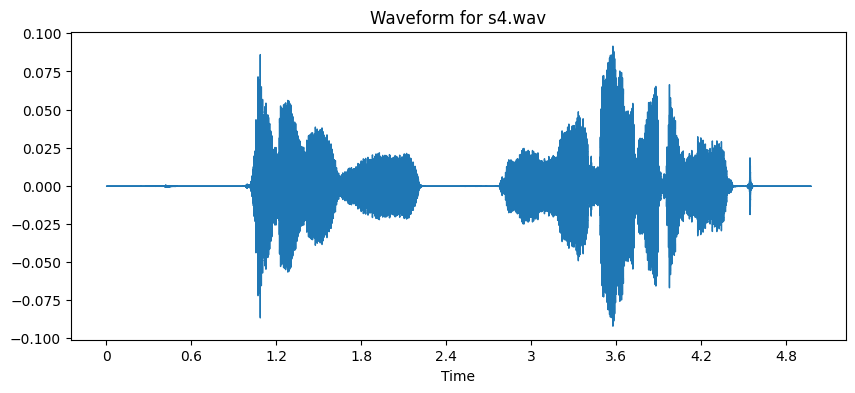

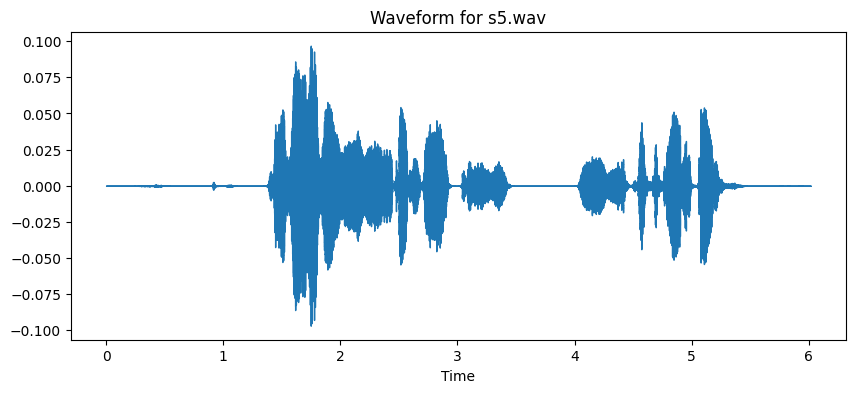

In [4]:
import matplotlib.pyplot as plt
import librosa.display
for i in range(1, 6):
    try:
        y, sr = librosa.load(f'/content/s{i}.wav')
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Waveform for s{i}.wav')
        plt.show()
    except FileNotFoundError:
        print(f"File s{i}.wav not found.")
    except Exception as e:
        print(f"An error occurred while processing s{i}.wav: {e}")

In [13]:
import numpy as np

def calculate_pauses(audio_file):
    try:
        y, sr = librosa.load(audio_file)
        energy = librosa.feature.rms(y=y)
        threshold = np.mean(energy) * 0.1
        pauses = np.where(energy[0] < threshold)[0]
        pause_segments = []
        current_segment = []
        for i in range(len(pauses)):
            if i == 0 or pauses[i] == pauses[i-1] + 1:
                current_segment.append(pauses[i])
            else:
                pause_segments.append(current_segment)
                current_segment = [pauses[i]]
        if current_segment:
            pause_segments.append(current_segment)

        num_pauses = len(pause_segments)
        return num_pauses
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error processing audio: {e}")
        return 0
df['pauses_per_sentence'] = df['samples'].apply(lambda x: calculate_pauses(f'/content/{x}.wav'))
df

,samples,stress,text,pauses_per_sentence
0,s1,no,everyday is a good day to learn something new ...,2
1,s2,no,machine learning helps find patterns in comple...,2
2,s3,yes,how to say that it was like when I kept my han...,7
3,s4,yes,I don't know maybe I might have done it,4
4,s5,yes,maybe I don't know I just like it was tough,4


In [14]:
import re
def extract_hesitation_markers(text):
  hesitation_markers = re.findall(r'\b(uh|um|uhm|ah|er|hmm)\b', text.lower())
  return hesitation_markers
df['hesitation_markers'] = df['text'].apply(extract_hesitation_markers)
df

,samples,stress,text,pauses_per_sentence,hesitation_markers
0,s1,no,everyday is a good day to learn something new ...,2,[]
1,s2,no,machine learning helps find patterns in comple...,2,[]
2,s3,yes,how to say that it was like when I kept my han...,7,[]
3,s4,yes,I don't know maybe I might have done it,4,[]
4,s5,yes,maybe I don't know I just like it was tough,4,[]


In [18]:
def calculate_speech_rate(text, audio_file):
    try:
        y, sr = librosa.load(audio_file)
        duration = librosa.get_duration(y=y, sr=sr)
        words = re.findall(r'\b\w+\b', text.lower())
        num_words = len(words)
        if duration > 0 and num_words > 0 :
          speech_rate = num_words / duration
          return speech_rate
        else:
          return 0
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error calculating speech rate: {e}")
        return 0
df['speech_rate'] = df.apply(lambda row: calculate_speech_rate(row['text'], f'/content/{row["samples"]}.wav'), axis=1)
df

,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate
0,s1,no,everyday is a good day to learn something new ...,2,[],2.113210
1,s2,no,machine learning helps find patents in complex...,2,[],1.768864
2,s3,yes,how to say that it was like when I kept my han...,7,[],2.061942
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788
4,s5,yes,maybe I don't know I just like it was stuff,4,[],1.828455


In [19]:
def calculate_pitch_variability(audio_file):
    try:
        y, sr = librosa.load(audio_file)
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_variability = np.std(pitches[magnitudes > np.max(magnitudes) / 2])
        return pitch_variability
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error calculating pitch variability: {e}")
        return 0
df['pitch_variability'] = df['samples'].apply(lambda x: calculate_pitch_variability(f'/content/{x}.wav'))
df

,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability
0,s1,no,everyday is a good day to learn something new ...,2,[],2.113210,62.205563
1,s2,no,machine learning helps find patents in complex...,2,[],1.768864,108.224854
2,s3,yes,how to say that it was like when I kept my han...,7,[],2.061942,93.687408
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180
4,s5,yes,maybe I don't know I just like it was stuff,4,[],1.828455,0.662285


In [25]:
def calculate_sentence_completion(text):
    sentence_completion_markers = r'[.!?]'
    matches = re.findall(sentence_completion_markers, text)
    return len(matches)

df['sentence_completion'] = df['text'].apply(calculate_sentence_completion)
df

,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability,sentence_completion
0,s1,no,Every day is a good day to learn something ne...,2,[],2.113210,62.205563,1
1,s2,no,Machine learning helps us find patterns in co...,2,[],1.768864,108.224854,1
2,s3,yes,How to say that? It was like when I kept my h...,7,[],2.061942,93.687408,2
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180,0
4,s5,yes,maybe I don't know I guess like it was tough,4,[],1.828455,0.662285,0


In [40]:
!pip install pysptk

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp311-cp311-linux_x86_64.whl size=1293738 sha256=f4d51ca85cf671d9f12f2cb164da8d993fd369847909f82320b9ee1d34a1e3da
  Stored in directory: /root/.cache/pip/wheels/f7/8e/e6/be2295ab3cba2d52e826922cd3ea8bda4a18210c03584dc759
Successfully built pysptk


In [41]:
import pysptk
def calculate_jitter(audio_file):
    try:
        y, sr = librosa.load(audio_file)
        f0 = pysptk.swipe(y.astype(np.float64), fs=sr, hopsize=80)
        f0 = f0[f0 != 0]
        if len(f0) < 2:
            return 0

        pitch_periods = 1 / f0
        jitter = np.std(np.diff(pitch_periods))
        return jitter
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error calculating jitter: {e}")
        return 0

def calculate_shimmer(audio_file):
    try:
        y, sr = librosa.load(audio_file)
        frames = librosa.util.frame(y, frame_length=256, hop_length=80)
        amplitudes = np.max(np.abs(frames), axis=0)

        if len(amplitudes) < 2:
          return 0
        shimmer = np.std(np.diff(amplitudes))
        return shimmer
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error calculating shimmer: {e}")
        return 0

df['jitter'] = df['samples'].apply(lambda x: calculate_jitter(f'/content/{x}.wav'))
df['shimmer'] = df['samples'].apply(lambda x: calculate_shimmer(f'/content/{x}.wav'))
df


,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability,sentence_completion,jitter,shimmer
0,s1,no,Every day is a good day to learn something ne...,2,[],2.113210,62.205563,1,0.000330,0.003511
1,s2,no,Machine learning helps us find patterns in co...,2,[],1.768864,108.224854,1,0.000171,0.005811
2,s3,yes,How to say that? It was like when I kept my h...,7,[],2.061942,93.687408,2,0.000106,0.003003
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180,0,0.000101,0.002804
4,s5,yes,maybe I don't know I guess like it was tough,4,[],1.828455,0.662285,0,0.000325,0.002628


In [43]:
def calculate_interword_silence(audio_file, threshold_db=-40):
    try:
        y, sr = librosa.load(audio_file)
        rms = librosa.feature.rms(y=y)
        db = librosa.amplitude_to_db(rms, ref=np.max)
        silence_indices = np.where(db[0] < threshold_db)[0]

        silence_segments = []
        current_segment = []
        for i in range(len(silence_indices)):
            if i == 0 or silence_indices[i] == silence_indices[i - 1] + 1:
                current_segment.append(silence_indices[i])
            else:
                silence_segments.append(current_segment)
                current_segment = [silence_indices[i]]
        if current_segment:
            silence_segments.append(current_segment)

        total_silence_duration = 0
        for segment in silence_segments:
            segment_duration = len(segment) * librosa.frames_to_time(1, sr=sr)
            total_silence_duration += segment_duration

        return total_silence_duration

    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return 0
    except Exception as e:
        print(f"Error calculating interword silence: {e}")
        return 0

df['inter_word_silences'] = df['samples'].apply(lambda x: calculate_interword_silence(f'/content/{x}.wav'))
df

,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability,sentence_completion,jitter,shimmer,inter_word_silences
0,s1,no,Every day is a good day to learn something ne...,2,[],2.113210,62.205563,1,0.000330,0.003511,1.811156
1,s2,no,Machine learning helps us find patterns in co...,2,[],1.768864,108.224854,1,0.000171,0.005811,1.486077
2,s3,yes,How to say that? It was like when I kept my h...,7,[],2.061942,93.687408,2,0.000106,0.003003,1.811156
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180,0,0.000101,0.002804,1.927256
4,s5,yes,maybe I don't know I guess like it was tough,4,[],1.828455,0.662285,0,0.000325,0.002628,2.530975


In [44]:
def calculate_mfcc(audio_file, n_mfcc=13):
    try:
        y, sr = librosa.load(audio_file)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfccs
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return None
    except Exception as e:
        print(f"Error calculating MFCCs: {e}")
        return None
df['mfccs'] = df['samples'].apply(lambda x: calculate_mfcc(f'/content/{x}.wav'))
df


,samples,stress,text,pauses_per_sentence,hesitation_markers,speech_rate,pitch_variability,sentence_completion,jitter,shimmer,inter_word_silences,mfccs
0,s1,no,Every day is a good day to learn something ne...,2,[],2.113210,62.205563,1,0.000330,0.003511,1.811156,"[[-710.94696, -710.94696, -710.94696, -710.946..."
1,s2,no,Machine learning helps us find patterns in co...,2,[],1.768864,108.224854,1,0.000171,0.005811,1.486077,"[[-749.88214, -749.88214, -749.88214, -749.882..."
2,s3,yes,How to say that? It was like when I kept my h...,7,[],2.061942,93.687408,2,0.000106,0.003003,1.811156,"[[-790.5043, -790.5043, -790.5043, -790.5043, ..."
3,s4,yes,I don't know maybe I might have done it,4,[],2.011788,1.578180,0,0.000101,0.002804,1.927256,"[[-707.05273, -707.05273, -707.05273, -707.052..."
4,s5,yes,maybe I don't know I guess like it was tough,4,[],1.828455,0.662285,0,0.000325,0.002628,2.530975,"[[-729.78906, -729.78906, -729.78906, -729.789..."


In [52]:
data=df.copy()

In [53]:
data.drop('samples',axis=1,inplace=True)
data.drop('text',axis=1,inplace=True)
data.drop('hesitation_markers',axis=1,inplace=True)
data

,stress,pauses_per_sentence,speech_rate,pitch_variability,sentence_completion,jitter,shimmer,inter_word_silences,mfccs
0,no,2,2.113210,62.205563,1,0.000330,0.003511,1.811156,"[[-710.94696, -710.94696, -710.94696, -710.946..."
1,no,2,1.768864,108.224854,1,0.000171,0.005811,1.486077,"[[-749.88214, -749.88214, -749.88214, -749.882..."
2,yes,7,2.061942,93.687408,2,0.000106,0.003003,1.811156,"[[-790.5043, -790.5043, -790.5043, -790.5043, ..."
3,yes,4,2.011788,1.578180,0,0.000101,0.002804,1.927256,"[[-707.05273, -707.05273, -707.05273, -707.052..."
4,yes,4,1.828455,0.662285,0,0.000325,0.002628,2.530975,"[[-729.78906, -729.78906, -729.78906, -729.789..."


In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['stress'])
data['stress'] = label_encoder.transform(data['stress'])
for i, label in enumerate(label_encoder.classes_):
  print(f"{label}: {i}")
data

no: 0
yes: 1


,stress,pauses_per_sentence,speech_rate,pitch_variability,sentence_completion,jitter,shimmer,inter_word_silences,mfccs
0,0,2,2.113210,62.205563,1,0.000330,0.003511,1.811156,"[[-710.94696, -710.94696, -710.94696, -710.946..."
1,0,2,1.768864,108.224854,1,0.000171,0.005811,1.486077,"[[-749.88214, -749.88214, -749.88214, -749.882..."
2,1,7,2.061942,93.687408,2,0.000106,0.003003,1.811156,"[[-790.5043, -790.5043, -790.5043, -790.5043, ..."
3,1,4,2.011788,1.578180,0,0.000101,0.002804,1.927256,"[[-707.05273, -707.05273, -707.05273, -707.052..."
4,1,4,1.828455,0.662285,0,0.000325,0.002628,2.530975,"[[-729.78906, -729.78906, -729.78906, -729.789..."


In [56]:
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway
from scipy.stats import pearsonr


X = data.drop(['stress','mfccs'], axis=1)
y = data['stress']



numerical_cols = X.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)
X_scaled_for_chi2 = X_scaled.clip(lower=0)

chi2_scores, p_values = chi2(X_scaled_for_chi2, y)

chi2_results = pd.DataFrame({'Feature': X_scaled_for_chi2.columns, 'Chi2_Score': chi2_scores, 'P_Value': p_values})
print("Chi-Square Test Results:")
print(chi2_results)

anova_results = {}
for col in numerical_cols:
    groups = [X.loc[y == i, col].values for i in np.unique(y)]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[col] = {'F-Statistic': f_statistic, 'P-Value': p_value}

anova_results = pd.DataFrame.from_dict(anova_results, orient='index')
anova_results.index.name = 'Feature'
print("\nANOVA F-Test Results:")
print(anova_results)

mi_scores = mutual_info_classif(X, y)
mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})
print("\nMutual Information Results:")
print(mi_results)


correlation_results = {}
for col in numerical_cols:
  correlation, p_value = pearsonr(X[col], y)
  correlation_results[col] = {'Correlation': correlation, 'P-Value': p_value}
correlation_results = pd.DataFrame.from_dict(correlation_results, orient='index')
correlation_results.index.name = 'Feature'
print("\nCorrelation Results:")
correlation_results


Chi-Square Test Results:
               Feature  Chi2_Score   P_Value
0  pauses_per_sentence    1.200000  0.273322
1          speech_rate    0.012879  0.909646
2    pitch_variability    0.601064  0.438172
3  sentence_completion    0.083333  0.772830
4               jitter    0.269596  0.603603
5              shimmer    1.395945  0.237404
6  inter_word_silences    0.523188  0.469485

ANOVA F-Test Results:
                     F-Statistic   P-Value
Feature                                   
pauses_per_sentence     5.400000  0.102728
speech_rate             0.027944  0.877872
pitch_variability       1.506831  0.307159
sentence_completion     0.150000  0.724377
jitter                  0.434151  0.557018
shimmer                 4.535179  0.123058
inter_word_silences     1.993252  0.252848

Mutual Information Results:
               Feature  Mutual_Information_Score
0  pauses_per_sentence                  0.300000
1          speech_rate                  0.000000
2    pitch_variability       

,Correlation,P-Value
Feature,,
pauses_per_sentence,0.801784,0.102728
speech_rate,0.096067,0.877872
pitch_variability,-0.578225,0.307159
sentence_completion,-0.218218,0.724377
jitter,-0.355558,0.557018
shimmer,-0.775801,0.123058
inter_word_silences,0.631814,0.252848


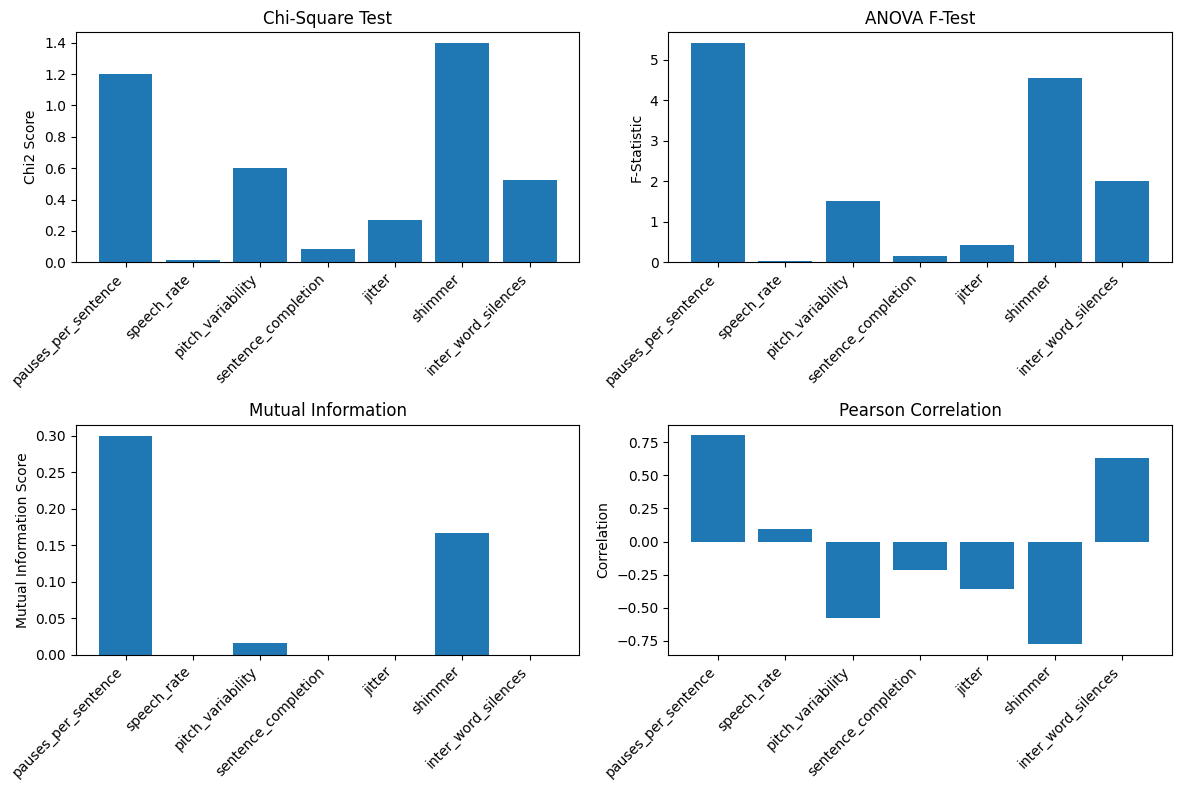

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(chi2_results['Feature'], chi2_results['Chi2_Score'])
plt.xticks(rotation=45, ha='right')
plt.title('Chi-Square Test')
plt.ylabel('Chi2 Score')

plt.subplot(2, 2, 2)
plt.bar(anova_results.index, anova_results['F-Statistic'])
plt.xticks(rotation=45, ha='right')
plt.title('ANOVA F-Test')
plt.ylabel('F-Statistic')


plt.subplot(2, 2, 3)
plt.bar(mi_results['Feature'], mi_results['Mutual_Information_Score'])
plt.xticks(rotation=45, ha='right')
plt.title('Mutual Information')
plt.ylabel('Mutual Information Score')


plt.subplot(2, 2, 4)
plt.bar(correlation_results.index, correlation_results['Correlation'])
plt.xticks(rotation=45, ha='right')
plt.title('Pearson Correlation')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()


In [58]:
selected_features = df[['pauses_per_sentence', 'pitch_variability', 'shimmer', 'inter_word_silences']]
selected_features

,pauses_per_sentence,pitch_variability,shimmer,inter_word_silences
0,2,62.205563,0.003511,1.811156
1,2,108.224854,0.005811,1.486077
2,7,93.687408,0.003003,1.811156
3,4,1.578180,0.002804,1.927256
4,4,0.662285,0.002628,2.530975


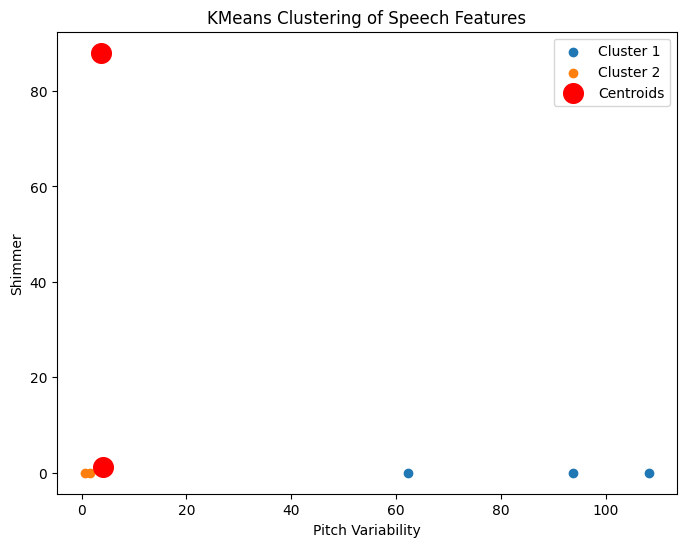

Sample s1: Cluster 1
Sample s2: Cluster 1
Sample s3: Cluster 1
Sample s4: Cluster 2
Sample s5: Cluster 2


In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(selected_features)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
for i in range(2):
    plt.scatter(selected_features[labels == i]['pitch_variability'], selected_features[labels == i]['shimmer'], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Pitch Variability')
plt.ylabel('Shimmer')
plt.title('KMeans Clustering of Speech Features')
plt.legend()
plt.show()
for i, label in enumerate(labels):
    print(f"Sample s{i+1}: Cluster {label+1}")